In [1]:
from client import Client
a = Client()

In [2]:
mapName = "Turbohill"
map = a.getMap(mapName)

http://localhost:8080/api/map?mapName=Turbohill


dict_keys(['name', 'dimX', 'dimY', 'nodes', 'edges', 'zones', 'ticks'])
     index  posX  posY      zoneId  \
id                                   
0.0      0     0     0  0.0<-->4.4   
0.1      1     0     1  0.0<-->4.4   
0.2      2     0     2  0.0<-->4.4   
0.3      3     0     3  0.0<-->4.4   
0.5      4     0     5  0.5<-->4.9   

                                             customers            target  
id                                                                        
0.0  [{'id': '0.15', 'type': 'Car', 'persona': 'Str...  {'Type': 'Null'}  
0.1  [{'id': '0.9', 'type': 'Car', 'persona': 'Disl...  {'Type': 'Null'}  
0.2                                                 []  {'Type': 'Null'}  
0.3                                                 []  {'Type': 'Null'}  
0.5  [{'id': '0.12', 'type': 'Car', 'persona': 'Neu...  {'Type': 'Null'}  
     index  posX  posY      zoneId  \
id                                   
0.0      0     0     0  0.0<-->4.4   
0.1      1     0     1

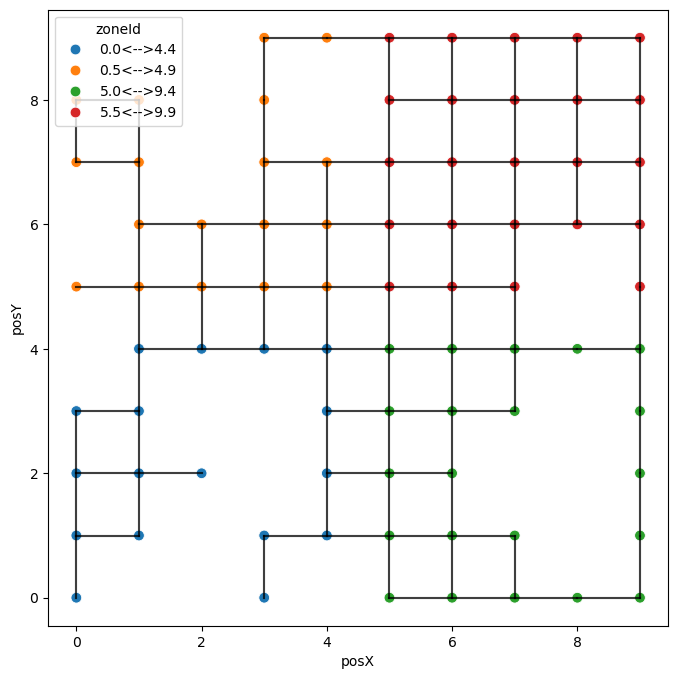

In [3]:
print(map.keys())

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

nodes = pd.DataFrame(map['nodes']).reset_index().set_index('id')
edges = pd.DataFrame(map['edges']).set_index('id')
junc_id_to_index = nodes.get('index')
edges = edges.join(junc_id_to_index.rename('fromIdx'), on = 'fromNode')
edges = edges.join(junc_id_to_index.rename('toIdx'), on = 'toNode')

print(nodes.head())
print(nodes)
print(edges.head())

xs = []
ys = []
for id, edge in edges.iterrows():
    x = [0,0]
    y = [0,0]
    x[0], y[0] = nodes.loc[edge['fromNode']].get(['posX','posY'])
    x[1], y[1] = nodes.loc[edge['toNode']].get(['posX','posY'])
    xs.append(x)
    ys.append(y)

xs = np.asarray(xs)
ys = np.asarray(ys)
plt.figure(figsize=(8,8))
plt.plot(xs.T,ys.T, color = 'k',alpha = 0.5);
sns.scatterplot(x = 'posX', y = 'posY', hue = 'zoneId', data = nodes, s = 60)

charging_nodes = pd.DataFrame([a for b,a in nodes.iterrows() if a.target.get('Type') != 'Null'])
print(charging_nodes.head())

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(80, 80))

{0: [np.int64(0), np.int64(0)], 1: [np.int64(0), np.int64(1)], 2: [np.int64(0), np.int64(2)], 3: [np.int64(0), np.int64(3)], 4: [np.int64(0), np.int64(5)], 5: [np.int64(0), np.int64(7)], 6: [np.int64(0), np.int64(8)], 7: [np.int64(1), np.int64(1)], 8: [np.int64(1), np.int64(2)], 9: [np.int64(1), np.int64(3)], 10: [np.int64(1), np.int64(4)], 11: [np.int64(1), np.int64(5)], 12: [np.int64(1), np.int64(6)], 13: [np.int64(1), np.int64(7)], 14: [np.int64(1), np.int64(8)], 15: [np.int64(2), np.int64(2)], 16: [np.int64(2), np.int64(4)], 17: [np.int64(2), np.int64(5)], 18: [np.int64(2), np.int64(6)], 19: [np.int64(3), np.int64(0)], 20: [np.int64(3), np.int64(1)], 21: [np.int64(3), np.int64(4)], 22: [np.int64(3), np.int64(5)], 23: [np.int64(3), np.int64(6)], 24: [np.int64(3), np.int64(7)], 25: [np.int64(3), np.int64(8)], 26: [np.int64(3), np.int64(9)], 27: [np.int64(4), np.int64(1)], 28: [np.int64(4), np.int64(2)], 29: [np.int64(4), np.int64(3)], 30: [np.int64(4), np.int64(4)], 31: [np.int64(4),

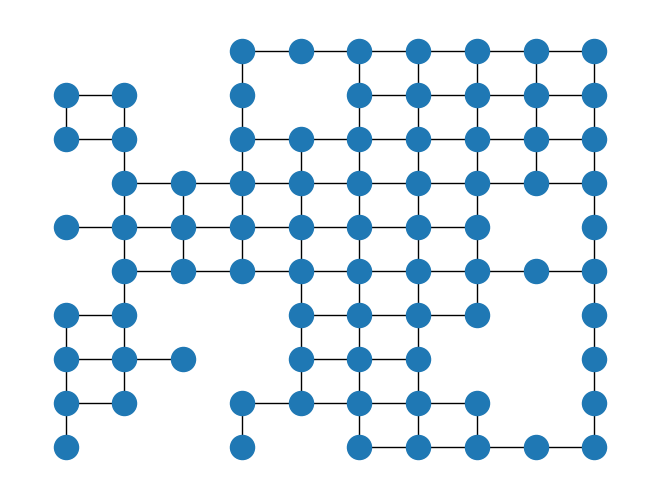

In [4]:
adjacency = np.zeros((nodes['index'].max()+1, nodes['index'].max()+1))
for id, edge in edges.iterrows():
    f_idx, t_idx = edge.get(['fromIdx','toIdx'])
    adjacency[f_idx,t_idx] = adjacency[t_idx,f_idx] = 1

display(adjacency)
import networkx as nx
graph = nx.from_numpy_array(adjacency)
pos = nodes.reset_index().get(['posX','posY'])
pos = {idx: list(row) for idx, row in zip(pos.index, pos.to_numpy())}
print(pos)
nx.draw(graph, pos=pos)


18

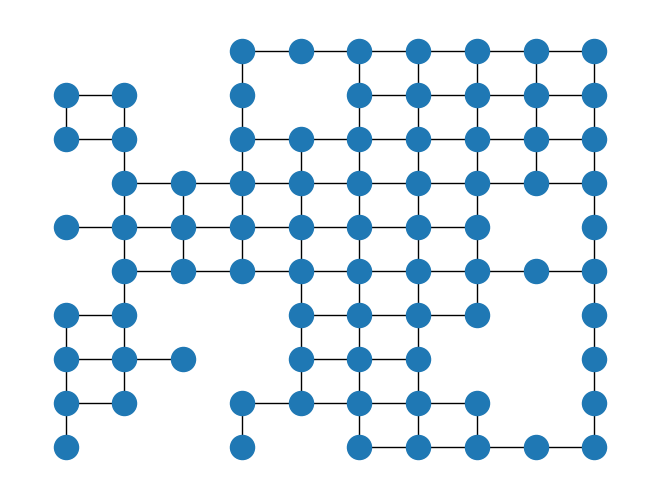

In [5]:
graph = nx.Graph()

nodes['coord'] = nodes.apply(lambda row: [row['posX'],row['posY']], axis = 1)
for id, node in nodes.drop(columns='customers').iterrows():
    graph.add_node(id, attr = node.to_dict())

for id, edge in edges.rename(columns={'length':'weight'}).iterrows():
    graph.add_edge(u_of_edge = edge['fromNode'],
                   v_of_edge = edge['toNode'],
                   weight = edge['weight'],
                   attr = edge.to_dict()
    )

def getCoord(node):
    return node['coord']
nx.draw(graph,edge_color='black', pos = nodes['coord'].to_dict())
nx.shortest_path(graph, '0.0','9.9')
nx.shortest_path_length(graph, '0.0','9.9')

In [ ]:
customers = [a for b in nodes['customers'].values for a in b]
customers += [a for b in edges['customers'].values for a in b]
print(customers)
customers = pd.DataFrame(customers)
customers.sort_values('chargeRemaining', ascending=False, inplace=True).head()

[{'id': '0.15', 'type': 'Car', 'persona': 'Stressed', 'fromNode': '0.0', 'toNode': '5.4', 'departureTick': 10, 'chargeRemaining': 0.6530316, 'maxCharge': 50, 'energyConsumptionPerKm': 0.2, 'state': 'Home'}, {'id': '0.9', 'type': 'Car', 'persona': 'DislikesDriving', 'fromNode': '0.1', 'toNode': '9.1', 'departureTick': 31, 'chargeRemaining': 1, 'maxCharge': 50, 'energyConsumptionPerKm': 0.2, 'state': 'Home'}, {'id': '0.12', 'type': 'Car', 'persona': 'Neutral', 'fromNode': '0.5', 'toNode': '1.6', 'departureTick': 4, 'chargeRemaining': 0.15, 'maxCharge': 50, 'energyConsumptionPerKm': 0.2, 'state': 'Home'}, {'id': '0.8', 'type': 'Car', 'persona': 'CostSensitive', 'fromNode': '0.7', 'toNode': '2.6', 'departureTick': 47, 'chargeRemaining': 0.30812758, 'maxCharge': 50, 'energyConsumptionPerKm': 0.2, 'state': 'Home'}, {'id': '0.18', 'type': 'Car', 'persona': 'CostSensitive', 'fromNode': '3.5', 'toNode': '3.7', 'departureTick': 18, 'chargeRemaining': 0.15593964, 'maxCharge': 50, 'energyConsumpti

,id,type,persona,fromNode,toNode,departureTick,chargeRemaining,maxCharge,energyConsumptionPerKm,state
0,0.15,Car,Stressed,0.0,5.4,10,0.653032,50.000000,0.2,Home
1,0.9,Car,DislikesDriving,0.1,9.1,31,1.000000,50.000000,0.2,Home
2,0.12,Car,Neutral,0.5,1.6,4,0.150000,50.000000,0.2,Home
3,0.8,Car,CostSensitive,0.7,2.6,47,0.308128,50.000000,0.2,Home
4,0.18,Car,CostSensitive,3.5,3.7,18,0.155940,50.000000,0.2,Home
5,0.5,Truck,EcoConscious,3.9,0.7,4,1.000000,100.000000,1.0,Home
6,0.6,Car,CostSensitive,3.9,0.7,24,0.339675,73.146650,0.2,Home
7,0.2,Truck,EcoConscious,4.2,3.7,46,0.733527,100.000000,1.0,Home
8,0.16,Car,CostSensitive,4.4,8.6,45,0.412557,50.000000,0.2,Home
9,0.4,Truck,EcoConscious,5.0,1.6,5,0.887633,116.834600,1.0,Home


In [7]:
zones = pd.DataFrame(map['zones']).set_index('id')
display(zones.head())
print([a.to_dict() for b, a in zones.iterrows()])
print(zones.loc['5.5<-->9.9']['energySources'])
print(zones.loc['5.5<-->9.9']['energyStorages'])

,topLeftX,topLeftY,bottomRightX,bottomRightY,energySources,energyStorages
id,,,,,,
0.0<-->4.4,0,0,4,4,"[{'type': 'Nuclear', 'generationCapacity': 0.5...","[{'capacityMWh': 800, 'efficiency': 0.85, 'max..."
0.5<-->4.9,0,5,4,9,"[{'type': 'Coal', 'generationCapacity': 0.5}]",[]
5.0<-->9.4,5,0,9,4,"[{'type': 'Hydro', 'generationCapacity': 0.5}]",[]
5.5<-->9.9,5,5,9,9,"[{'type': 'Nuclear', 'generationCapacity': 0.5...","[{'capacityMWh': 500, 'efficiency': 0.85, 'max..."


[{'topLeftX': 0, 'topLeftY': 0, 'bottomRightX': 4, 'bottomRightY': 4, 'energySources': [{'type': 'Nuclear', 'generationCapacity': 0.5}, {'type': 'NaturalGas', 'generationCapacity': 0.5}], 'energyStorages': [{'capacityMWh': 800, 'efficiency': 0.85, 'maxChargePowerMw': 80, 'maxDischargePowerMw': 80}, {'capacityMWh': 300, 'efficiency': 0.85, 'maxChargePowerMw': 30, 'maxDischargePowerMw': 30}]}, {'topLeftX': 0, 'topLeftY': 5, 'bottomRightX': 4, 'bottomRightY': 9, 'energySources': [{'type': 'Coal', 'generationCapacity': 0.5}], 'energyStorages': []}, {'topLeftX': 5, 'topLeftY': 0, 'bottomRightX': 9, 'bottomRightY': 4, 'energySources': [{'type': 'Hydro', 'generationCapacity': 0.5}], 'energyStorages': []}, {'topLeftX': 5, 'topLeftY': 5, 'bottomRightX': 9, 'bottomRightY': 9, 'energySources': [{'type': 'Nuclear', 'generationCapacity': 0.5}, {'type': 'Hydro', 'generationCapacity': 0.5}], 'energyStorages': [{'capacityMWh': 500, 'efficiency': 0.85, 'maxChargePowerMw': 50, 'maxDischargePowerMw': 50}

In [8]:
print(charging_nodes.head(1))
print(charging_nodes.head(1)['target']['1.1'])

     index  posX  posY      zoneId customers  \
1.1      7     1     1  0.0<-->4.4        []   

                                                target  
1.1  {'Type': 'ChargingStation', 'amountOfAvailable...  
{'Type': 'ChargingStation', 'amountOfAvailableChargers': 3, 'totalAmountOfBrokenChargers': 2, 'chargeSpeedPerCharger': 199, 'totalAmountOfChargers': 5}


In [9]:
from G_Map import g_map
testmap = g_map(map)
testmap.distance('1.1','2.2')

62.968165